# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
import pickle
azdias_dummy = pickle.load(open("azdias_dummy.pickle", "rb"))

In [3]:
customers_dummy = pickle.load(open("customers_dummy.pickle", "rb"))

In [4]:
azdias_dummy.head()

,LNR,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ALTERSKATEGORIE_GROB,NATIONALITAET_KZ_0,NATIONALITAET_KZ_1,NATIONALITAET_KZ_2,NATIONALITAET_KZ_3
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,2,1,0,0,0
1,910220,9.0,11.0,0.0,0.0,2.0,12.0,0.0,3.0,6.0,...,10.0,3.0,9.0,4.0,5,1,0,1,0,0
2,910225,9.0,10.0,0.0,0.0,1.0,7.0,0.0,3.0,2.0,...,6.0,3.0,9.0,2.0,5,3,0,1,0,0
3,910226,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,...,11.0,NaN,9.0,7.0,3,4,0,1,0,0
4,910241,1.0,3.0,0.0,0.0,4.0,3.0,0.0,4.0,2.0,...,4.0,2.0,9.0,3.0,4,3,0,1,0,0


In [5]:
customers_dummy.head()

,LNR,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0
0,9626,1.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,...,7.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,1.0,4.0,1,0,0
1,9628,9.0,NaN,NaN,NaN,0.0,3.0,NaN,0.0,NaN,...,NaN,3.0,FOOD,SINGLE_BUYER,0,1.0,4.0,1,0,0
2,143872,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,...,2.0,3.0,COSMETIC_AND_FOOD,MULTI_BUYER,0,2.0,4.0,1,0,0
3,143873,1.0,8.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,...,7.0,1.0,COSMETIC,MULTI_BUYER,0,1.0,4.0,1,0,0
4,143874,1.0,14.0,7.0,0.0,0.0,4.0,7.0,0.0,3.0,...,3.0,1.0,FOOD,MULTI_BUYER,0,1.0,3.0,1,0,0


In [6]:
# as tehre Nans in the data tables, we need to impute them
from sklearn.preprocessing import Imputer

In [7]:
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [8]:
azdias_dummy.columns[~azdias_dummy.columns.isin(customers_dummy.columns)]

Index(['KBA05_BAUMAX', 'KKK', 'REGIOTYP', 'NATIONALITAET_KZ_0',
       'NATIONALITAET_KZ_1', 'NATIONALITAET_KZ_2', 'NATIONALITAET_KZ_3'],
      dtype='object')

In [43]:
azdias_dummy_less = azdias_dummy.drop(['KBA05_BAUMAX', 'KKK', 'REGIOTYP',
                    'NATIONALITAET_KZ_0', 'NATIONALITAET_KZ_1', 'NATIONALITAET_KZ_2', 'NATIONALITAET_KZ_3'], axis=1)

In [10]:
customers_dummy.columns[~customers_dummy.columns.isin(azdias_dummy.columns)]

Index(['ALTERSKATEGORIE_FEIN', 'CJT_GESAMTTYP', 'D19_KONSUMTYP',
       'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_SOZIALES',
       'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'FINANZTYP',
       'GEBAEUDETYP', 'GEBAEUDETYP_RASTER', 'GFK_URLAUBERTYP', 'HEALTH_TYP',
       'KBA05_HERSTTEMP', 'KBA05_MAXHERST', 'KBA05_MODTEMP', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'OST_WEST_KZ',
       'PRAEGENDE_JUGENDJAHRE', 'SHOPPER_TYP', 'VERS_TYP', 'PRODUCT_GROUP',
       'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'ANREDE_KZ',
       'NATIONALITAET_KZ_1.0', 'NATIONALITAET_KZ_2.0', 'NATIONALITAET_KZ_3.0'],
      dtype='object')

In [11]:
customers_dummy_less = customers_dummy.drop(['ALTERSKATEGORIE_FEIN', 'CJT_GESAMTTYP', 'D19_KONSUMTYP',
                    'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_SOZIALES', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'FINANZTYP', 'GEBAEUDETYP', 'GEBAEUDETYP_RASTER', 'GFK_URLAUBERTYP', 'HEALTH_TYP',
       'KBA05_HERSTTEMP', 'KBA05_MAXHERST', 'KBA05_MODTEMP', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'OST_WEST_KZ',
       'PRAEGENDE_JUGENDJAHRE', 'SHOPPER_TYP', 'VERS_TYP', 'PRODUCT_GROUP',
       'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'ANREDE_KZ',
       'NATIONALITAET_KZ_1.0', 'NATIONALITAET_KZ_2.0', 'NATIONALITAET_KZ_3.0'], axis=1)

In [12]:
customers_dummy_less.columns[~customers_dummy_less.columns.isin(azdias_dummy_less.columns)]

Index([], dtype='object')

In [44]:
azdias_dummy_less.columns[~azdias_dummy_less.columns.isin(customers_dummy_less.columns)]

Index([], dtype='object')

In [48]:
for columns in azdias_dummy_less.columns:
        print(azdias_dummy_less[columns].value_counts())

192418     1
611455     1
982154     1
976009     1
978056     1
955527     1
957574     1
951429     1
953476     1
963715     1
965762     1
959617     1
961664     1
613502     1
1021095    1
607357     1
609404     1
619643     1
621690     1
615545     1
617592     1
595063     1
597110     1
590965     1
593012     1
603251     1
980107     1
969868     1
967821     1
973966     1
          ..
626587     1
624538     1
581553     1
577459     1
735180     1
587700     1
724939     1
722890     1
729033     1
726984     1
749511     1
747462     1
753605     1
751556     1
741315     1
739266     1
745409     1
743360     1
569279     1
567230     1
573373     1
571324     1
561083     1
559034     1
565177     1
563128     1
585655     1
583606     1
589749     1
192606     1
Name: LNR, Length: 891221, dtype: int64
1.0    390258
9.0    270663
5.0     29203
6.0     27655
3.0     24880
4.0     21466
7.0     21026
8.0     17485
2.0     15086
Name: AKT_DAT_KL, dtype: int64
1.0      1

In [16]:
pickle.dump(azdias_dummy_less, open("azdias_dummy_less.pickle", "wb"))

In [17]:
pickle.dump(customers_dummy_less, open("customers_dummy_less.pickle", "wb"))

In [18]:
dias_attribues = pd.read_excel('DIAS Attributes - Values 2017.xlsx')

In [20]:
dias_attribues_attribute = dias_attribues["Attribute"]

In [21]:
dias_attribues_attribute.head()

0    AGER_TYP
1         NaN
2         NaN
3         NaN
4         NaN
Name: Attribute, dtype: object

In [26]:
dias_attribues_attribute_filled = dias_attribues_attribute.dropna()

In [23]:
azdias_dummy_less_columns = list(azdias_dummy_less.columns) 

In [24]:
azdias_dummy_less_columns

['LNR',
 'AKT_DAT_KL',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_TITEL',
 'ARBEIT',
 'BALLRAUM',
 'CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'CJT_KATALOGNUTZER',
 'CJT_TYP_1',
 'CJT_TYP_2',
 'CJT_TYP_3',
 'CJT_TYP_4',
 'CJT_TYP_5',
 'CJT_TYP_6',
 'D19_BANKEN_DIREKT',
 'D19_BANKEN_GROSS',
 'D19_BANKEN_LOKAL',
 'D19_BANKEN_REST',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT',
 'D19_GARTEN',
 'D19_HANDWERK',
 'D19_HAUS_DEKO',
 'D19_KINDERARTIKEL',
 'D19_KONSUMTYP_MAX',
 'D19_KOSMETIK',
 'D19_LEBENSMITTEL',
 'D19_NAHRUNGSERGAENZUNG',
 'D19_RATGEBER',
 'D19_REISEN',
 'D19_SAMMELARTIKEL',
 'D19_SCHUHE',
 'D19_SONSTIGE',
 'D19_TECHNIK',
 'D19_TELKO_MOBILE',
 'D19_TELKO_REST',
 'D19_TIERARTIKEL',
 'D19_VERSAND_REST',
 'D19_VERSI_DATUM',
 'D19_VERSI_OFFLINE_DATUM',
 'D19_VERSI_ONLINE_DATUM

In [27]:
dias_attribues_attribute_filled.tolist()

['AGER_TYP',
 'ALTERSKATEGORIE_GROB',
 'ALTER_HH',
 'ANREDE_KZ',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'BALLRAUM',
 'BIP_FLAG',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CAMEO_DEUINTL_2015',
 'CJT_GESAMTTYP',
 'D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DATUM',
 'D19_BANKEN_DIREKT_RZ',
 'D19_BANKEN_GROSS_RZ',
 'D19_BANKEN_LOKAL_RZ',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_BANKEN_REST_RZ',
 'D19_BEKLEIDUNG_GEH_RZ',
 'D19_BEKLEIDUNG_REST_RZ',
 'D19_BILDUNG_RZ',
 'D19_BIO_OEKO_RZ',
 'D19_BUCH_RZ',
 'D19_DIGIT_SERV_RZ',
 'D19_DROGERIEARTIKEL_RZ',
 'D19_ENERGIE_RZ',
 'D19_FREIZEIT_RZ',
 'D19_GARTEN_RZ',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_HANDWERK_RZ',
 'D19_HAUS_DEKO_RZ',
 'D19_KINDERARTIKEL_RZ',
 'D19_KONSUMTYP',
 'D19_KK_KUNDENTYP',
 'D19_KOSMETIK_RZ',
 'D19_LEBENSMITT

In [28]:
azdias_dummy_less_columns_Atributes_check = set(dias_attribues_attribute_filled) & set(azdias_dummy_less_columns)

In [33]:
azdias_dummy_less_columns_Atributes_check_list = list(azdias_dummy_less_columns_Atributes_check)

In [34]:
azdias_dummy_less_columns_Atributes_check_list

['KBA13_CCM_1200',
 'KBA13_SEG_KLEINST',
 'KBA05_KRSZUL',
 'KBA13_SEG_SONSTIGE',
 'EWDICHTE',
 'KBA13_KW_61_120',
 'KBA13_SEG_OBERKLASSE',
 'PLZ8_GBZ',
 'ANZ_HAUSHALTE_AKTIV',
 'W_KEIT_KIND_HH',
 'KBA05_MOD2',
 'KBA05_ZUL1',
 'KBA13_CCM_3000',
 'KBA05_ALTER1',
 'KBA13_KW_90',
 'KBA13_HERST_FORD_OPEL',
 'ANZ_HH_TITEL',
 'PLZ8_ANTG3',
 'KBA05_HERST5',
 'KBA05_ALTER2',
 'KBA05_SEG2',
 'SEMIO_PFLICHT',
 'KBA13_HALTER_60',
 'PLZ8_ANTG1',
 'KBA13_VORB_0',
 'KBA13_PEUGEOT',
 'KBA13_SEG_WOHNMOBILE',
 'KBA05_MAXSEG',
 'KBA13_KMH_250',
 'KBA13_KW_30',
 'KBA13_CCM_1800',
 'KBA13_CCM_2000',
 'KBA13_KRSSEG_VAN',
 'GREEN_AVANTGARDE',
 'KBA13_HERST_SONST',
 'KBA13_KW_0_60',
 'KBA13_ALTERHALTER_30',
 'KBA05_DIESEL',
 'KBA13_KW_110',
 'KBA05_KW2',
 'KBA13_SEG_OBEREMITTELKLASSE',
 'KBA13_KMH_110',
 'KBA13_FORD',
 'KBA13_ALTERHALTER_61',
 'KBA13_CCM_0_1400',
 'KBA05_SEG3',
 'KBA13_SEG_GROSSRAUMVANS',
 'KBA05_HERST4',
 'KBA13_BJ_2000',
 'KBA13_SEG_MINIWAGEN',
 'SEMIO_DOM',
 'KBA05_SEG1',
 'KBA05_MAXAH',
 

In [35]:
azdias_dummy_less_smaller = azdias_dummy_less[azdias_dummy_less_columns_Atributes_check_list]

In [ ]:
customers_dummy_less_smaller = customers_dummy_less[azdias_dummy_less_columns_Atributes_check_list]

In [36]:
azdias_dummy_less_smaller.head()

,KBA13_CCM_1200,KBA13_SEG_KLEINST,KBA05_KRSZUL,KBA13_SEG_SONSTIGE,EWDICHTE,KBA13_KW_61_120,KBA13_SEG_OBERKLASSE,PLZ8_GBZ,ANZ_HAUSHALTE_AKTIV,W_KEIT_KIND_HH,...,FINANZ_SPARER,FINANZ_MINIMALIST,KBA13_KW_121,KBA13_HERST_AUDI_VW,KBA05_ZUL2,KBA13_HALTER_30,KBA05_CCM1,KBA13_HERST_EUROPA,KBA05_VORB0,KBA05_SEG8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,11.0,3.0,...,5.0,1.0,3.0,4.0,1.0,3.0,1.0,4.0,1.0,3.0
2,2.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,10.0,3.0,...,4.0,1.0,4.0,2.0,3.0,2.0,5.0,3.0,4.0,0.0
3,2.0,3.0,3.0,2.0,2.0,2.0,1.0,4.0,1.0,NaN,...,2.0,4.0,5.0,4.0,3.0,2.0,2.0,2.0,2.0,0.0
4,1.0,3.0,2.0,5.0,5.0,2.0,4.0,3.0,3.0,2.0,...,3.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,5.0,0.0


In [ ]:
imputer_azdias_dummy = imputer.fit_transform(azdias_dummy_less_smaller)

In [37]:
azdias_dummy_less.head()

,LNR,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,...,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ALTERSKATEGORIE_GROB
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
1,910220,9.0,11.0,0.0,0.0,2.0,12.0,0.0,3.0,6.0,...,0.0,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,1
2,910225,9.0,10.0,0.0,0.0,1.0,7.0,0.0,3.0,2.0,...,0.0,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,3
3,910226,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,...,1.0,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,4
4,910241,1.0,3.0,0.0,0.0,4.0,3.0,0.0,4.0,2.0,...,0.0,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,3


In [50]:
azdias_dummy_less_no_flag = azdias_dummy_less.drop(['DSL_FLAG'], axis=1)

In [ ]:
imputer_azdias_dummy = imputer.fit_transform(azdias_dummy_less_no_flag)

In [51]:
imputer_azdias_dummy = imputer.fit_transform(azdias_dummy_less_no_flag)

MemoryError: 

In [1]:
import pickle

In [2]:
azdias_dummy_less = pickle.load(open("azdias_dummy_less.pickle", "rb"))

In [16]:
azdias_dummy_less_no_flag = azdias_dummy_less.drop(['CAMEO_INTL_2015', 'EINGEFUEGT_AM', 'D19_BEKLEIDUNG_REST', 'D19_VERSAND_REST', 'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_DATUM', 'D19_VERSI_ONLINE_DATUM', 'D19_VERSICHERUNGEN', 'DSL_FLAG', 'D19_WEIN_FEINKOST', 'D19_VOLLSORTIMENT', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'BALLRAUM'], axis=1)

In [11]:
for i in azdias_dummy_less_no_flag.columns:
    print(azdias_dummy_less_no_flag[i].value_counts())

192418     1
611455     1
982154     1
976009     1
978056     1
955527     1
957574     1
951429     1
953476     1
963715     1
965762     1
959617     1
961664     1
613502     1
1021095    1
607357     1
609404     1
619643     1
621690     1
615545     1
617592     1
595063     1
597110     1
590965     1
593012     1
603251     1
980107     1
969868     1
967821     1
973966     1
          ..
626587     1
624538     1
581553     1
577459     1
735180     1
587700     1
724939     1
722890     1
729033     1
726984     1
749511     1
747462     1
753605     1
751556     1
741315     1
739266     1
745409     1
743360     1
569279     1
567230     1
573373     1
571324     1
561083     1
559034     1
565177     1
563128     1
585655     1
583606     1
589749     1
192606     1
Name: LNR, Length: 891221, dtype: int64
1.0    390258
9.0    270663
5.0     29203
6.0     27655
3.0     24880
4.0     21466
7.0     21026
8.0     17485
2.0     15086
Name: AKT_DAT_KL, dtype: int64
1.0      1

In [13]:
azdias_dummy_less_no_flag['EINGEFUEGT_AM']

0                         NaN
1         1992-02-10 00:00:00
2         1992-02-12 00:00:00
3         1997-04-21 00:00:00
4         1992-02-12 00:00:00
5         1992-02-12 00:00:00
6         1992-02-12 00:00:00
7         1992-02-10 00:00:00
8         1992-02-10 00:00:00
9         1992-02-10 00:00:00
10        1992-02-10 00:00:00
11                        NaN
12        2005-12-30 00:00:00
13        2009-01-19 00:00:00
14                        NaN
15        1992-02-12 00:00:00
16        1995-02-02 00:00:00
17                        NaN
18        1996-12-05 00:00:00
19        1992-02-12 00:00:00
20        2002-03-13 00:00:00
21        1992-02-12 00:00:00
22        1992-02-10 00:00:00
23        1992-02-12 00:00:00
24                        NaN
25        1992-02-12 00:00:00
26        2015-04-01 00:00:00
27        1996-05-09 00:00:00
28        1992-02-12 00:00:00
29        2005-04-12 00:00:00
                 ...         
891191    1992-02-10 00:00:00
891192    1992-02-12 00:00:00
891193    

In [5]:
from sklearn.preprocessing import Imputer
import numpy as np
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [17]:
imputer_azdias_dummy = imputer.fit_transform(azdias_dummy_less_no_flag)

In [19]:
imputer_azdias_dummy

array([[  9.10215000e+05,   4.42192823e+00,   8.28726320e+00, ...,
          4.08844010e+00,   3.00000000e+00,   2.00000000e+00],
       [  9.10220000e+05,   9.00000000e+00,   1.10000000e+01, ...,
          4.00000000e+00,   5.00000000e+00,   1.00000000e+00],
       [  9.10225000e+05,   9.00000000e+00,   1.00000000e+01, ...,
          2.00000000e+00,   5.00000000e+00,   3.00000000e+00],
       ..., 
       [  8.25772000e+05,   1.00000000e+00,   3.00000000e+00, ...,
          7.00000000e+00,   4.00000000e+00,   2.00000000e+00],
       [  8.25776000e+05,   9.00000000e+00,   7.00000000e+00, ...,
          5.00000000e+00,   5.00000000e+00,   1.00000000e+00],
       [  8.25787000e+05,   1.00000000e+00,   1.00000000e+01, ...,
          4.00000000e+00,   3.00000000e+00,   4.00000000e+00]])

In [21]:
pickle.dump(imputer_azdias_dummy, open("imputer_azdias_dummy.pickle", "wb"))

In [ ]:
imputer_customers_dummy_1 = azdias_dummy_less.drop(['CAMEO_INTL_2015', 'EINGEFUEGT_AM', 'D19_BEKLEIDUNG_REST', 'D19_VERSAND_REST', 'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_DATUM', 'D19_VERSI_ONLINE_DATUM', 'D19_VERSICHERUNGEN', 'DSL_FLAG', 'D19_WEIN_FEINKOST', 'D19_VOLLSORTIMENT', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'BALLRAUM'], axis=1)

In [ ]:
imputer_customers_dummy = imputer.fit_transform(imputer_customers_dummy_1)

In [7]:
for i in azdias_dummy_less_no_flag.columns:
    print(azdias_dummy_less_no_flag[i].value_counts())

192418     1
611455     1
982154     1
976009     1
978056     1
955527     1
957574     1
951429     1
953476     1
963715     1
965762     1
959617     1
961664     1
613502     1
1021095    1
607357     1
609404     1
619643     1
621690     1
615545     1
617592     1
595063     1
597110     1
590965     1
593012     1
603251     1
980107     1
969868     1
967821     1
973966     1
          ..
626587     1
624538     1
581553     1
577459     1
735180     1
587700     1
724939     1
722890     1
729033     1
726984     1
749511     1
747462     1
753605     1
751556     1
741315     1
739266     1
745409     1
743360     1
569279     1
567230     1
573373     1
571324     1
561083     1
559034     1
565177     1
563128     1
585655     1
583606     1
589749     1
192606     1
Name: LNR, Length: 891221, dtype: int64
1.0    390258
9.0    270663
5.0     29203
6.0     27655
3.0     24880
4.0     21466
7.0     21026
8.0     17485
2.0     15086
Name: AKT_DAT_KL, dtype: int64
1.0      1

In [ ]:
azdias_dummy_less_no_flag

In [1]:
import pickle
imputer_azdias_dummy = pickle.load(open("imputer_azdias_dummy.pickle", "rb"))

In [3]:
customers_dummy_less = pickle.load(open("customers_dummy_less.pickle", "rb"))

In [2]:
imputer_azdias_dummy

array([[  9.10215000e+05,   4.42192823e+00,   8.28726320e+00, ...,
          4.08844010e+00,   3.00000000e+00,   2.00000000e+00],
       [  9.10220000e+05,   9.00000000e+00,   1.10000000e+01, ...,
          4.00000000e+00,   5.00000000e+00,   1.00000000e+00],
       [  9.10225000e+05,   9.00000000e+00,   1.00000000e+01, ...,
          2.00000000e+00,   5.00000000e+00,   3.00000000e+00],
       ..., 
       [  8.25772000e+05,   1.00000000e+00,   3.00000000e+00, ...,
          7.00000000e+00,   4.00000000e+00,   2.00000000e+00],
       [  8.25776000e+05,   9.00000000e+00,   7.00000000e+00, ...,
          5.00000000e+00,   5.00000000e+00,   1.00000000e+00],
       [  8.25787000e+05,   1.00000000e+00,   1.00000000e+01, ...,
          4.00000000e+00,   3.00000000e+00,   4.00000000e+00]])

In [5]:
imputer_customers_dummy_1 = customers_dummy_less.drop(['CAMEO_INTL_2015', 'EINGEFUEGT_AM', 'D19_BEKLEIDUNG_REST', 'D19_VERSAND_REST', 'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_DATUM', 'D19_VERSI_ONLINE_DATUM', 'D19_VERSICHERUNGEN', 'DSL_FLAG', 'D19_WEIN_FEINKOST', 'D19_VOLLSORTIMENT', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'BALLRAUM'], axis=1)

In [6]:
from sklearn.preprocessing import Imputer
import numpy as np
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [7]:
imputer_customers_dummy = imputer.fit_transform(imputer_customers_dummy_1)

In [8]:
imputer_customers_dummy

array([[  9.62600000e+03,   1.00000000e+00,   1.00000000e+00, ...,
          7.00000000e+00,   3.00000000e+00,   4.00000000e+00],
       [  9.62800000e+03,   9.00000000e+00,   4.96586347e+00, ...,
          3.75244279e+00,   3.00000000e+00,   4.00000000e+00],
       [  1.43872000e+05,   1.00000000e+00,   1.00000000e+00, ...,
          2.00000000e+00,   3.00000000e+00,   4.00000000e+00],
       ..., 
       [  1.48813000e+05,   1.00000000e+00,   1.00000000e+00, ...,
          3.00000000e+00,   3.00000000e+00,   4.00000000e+00],
       [  1.48852000e+05,   1.00000000e+00,   4.00000000e+00, ...,
          2.00000000e+00,   3.00000000e+00,   3.00000000e+00],
       [  1.48883000e+05,   1.00000000e+00,   1.00000000e+00, ...,
          7.00000000e+00,   1.00000000e+00,   2.00000000e+00]])

In [9]:
pickle.dump(imputer_customers_dummy, open("imputer_customers_dummy.pickle", "wb"))

In [19]:
import pandas as pd
imputer_azdias_dummy_df = pd.DataFrame(imputer_azdias_dummy)

In [20]:
imputer_azdias_dummy_df.head()

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
0,910215.0,4.421928,8.287263,0.040647,0.154018,1.727637,7.599356,0.004162,3.167854,5.0,...,0.43882,2.417322,6.001214,7.53213,5.945972,3.933406,7.908791,4.08844,3.0,2.0
1,910220.0,9.000000,11.000000,0.000000,0.000000,2.000000,12.000000,0.000000,3.000000,1.0,...,0.00000,4.000000,8.000000,11.00000,10.000000,3.000000,9.000000,4.00000,5.0,1.0
2,910225.0,9.000000,10.000000,0.000000,0.000000,1.000000,7.000000,0.000000,3.000000,2.0,...,0.00000,2.000000,9.000000,9.00000,6.000000,3.000000,9.000000,2.00000,5.0,3.0
3,910226.0,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.0,...,1.00000,0.000000,7.000000,10.00000,11.000000,3.933406,9.000000,7.00000,3.0,4.0
4,910241.0,1.000000,3.000000,0.000000,0.000000,4.000000,3.000000,0.000000,4.000000,3.0,...,0.00000,2.000000,3.000000,5.00000,4.000000,2.000000,9.000000,3.00000,4.0,3.0


In [14]:
#now the data has to be normalized (scaling numerical features into a normalized range, 0-1:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler()

azdias_scaled = pd.DataFrame(scaler.fit_transform(imputer_azdias_dummy))

In [17]:
customers_scaled = pd.DataFrame(scaler.fit_transform(imputer_customers_dummy))

In [22]:
azdias_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
count,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000
mean,0.500000,0.427741,0.013928,0.001767,0.014002,0.038392,0.016925,0.000694,0.270982,0.583816,...,0.087764,0.604330,0.500121,0.544344,0.494597,0.655568,0.863599,0.441206,0.472488,0.222175
std,0.288676,0.435691,0.024855,0.013299,0.043748,0.024604,0.030206,0.010992,0.118266,0.372390,...,0.219027,0.271089,0.273174,0.258865,0.265080,0.307047,0.230266,0.258498,0.270541,0.133597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.003361,0.000000,0.000000,0.022222,0.004454,0.000000,0.250000,0.250000,...,0.000000,0.500000,0.300000,0.416667,0.300000,0.500000,0.863599,0.285714,0.400000,0.125000
50%,0.500000,0.375000,0.008403,0.000000,0.000000,0.022222,0.008909,0.000000,0.250000,0.750000,...,0.000000,0.604330,0.500121,0.544344,0.500000,0.666667,1.000000,0.428571,0.400000,0.250000
75%,0.750000,1.000000,0.015126,0.000000,0.000000,0.044444,0.017817,0.000000,0.375000,1.000000,...,0.087764,0.750000,0.700000,0.750000,0.700000,1.000000,1.000000,0.571429,0.600000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
customers_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
count,191652.000000,191652.000000,191652.000000,191652.000000,191652.00000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,...,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,0.500000,0.093441,0.009495,0.002931,0.01705,0.107992,0.012537,0.004078,0.228106,0.752485,...,0.173707,0.607377,0.337442,0.297064,0.216887,0.650241,0.955796,0.393206,0.315361,0.257613
std,0.288677,0.213835,0.023529,0.020241,0.05364,0.057610,0.032526,0.026488,0.108616,0.341833,...,0.229768,0.243173,0.253293,0.208384,0.193456,0.316906,0.125495,0.254214,0.233697,0.135782
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.001912,0.000000,0.00000,0.047619,0.002667,0.000000,0.125000,0.500000,...,0.000000,0.500000,0.100000,0.166667,0.100000,0.400000,0.955796,0.285714,0.000000,0.250000
50%,0.500000,0.000000,0.003824,0.000000,0.00000,0.107992,0.005333,0.000000,0.228106,1.000000,...,0.173707,0.607377,0.337442,0.297064,0.216887,0.650241,1.000000,0.393206,0.400000,0.250000
75%,0.750000,0.093441,0.009495,0.002931,0.01705,0.142857,0.012537,0.004078,0.250000,1.000000,...,0.200000,0.750000,0.500000,0.416667,0.300000,1.000000,1.000000,0.428571,0.400000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# I am checking what MinMaxScaler() hast done. I see that for both dataframes minimum and maximum values are 0 and 1 as expected. 

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [23]:
#Dimensionality Reduction - forming a smaller groups of features for future analysis. PCA Analysis will be used in order to find the features which have the most variance.



In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components)
n_components = 0

In [27]:
pca_azdias = pca.fit_transform(azdias_scaled)

In [28]:
pca_azdias

array([[  7.56000444e-02,   6.19246515e-01,  -1.19176376e-01, ...,
         -1.41414633e-04,  -4.08091914e-05,  -2.40232119e-16],
       [  1.49484939e+00,  -1.44843921e+00,   8.77127746e-01, ...,
          7.35770434e-04,  -2.64622447e-03,   5.26850550e-16],
       [ -3.08648760e-01,  -6.66692376e-01,   1.23009241e+00, ...,
         -3.11804149e-04,   3.83901599e-03,   1.74835174e-16],
       ..., 
       [ -8.44112881e-01,  -2.04136799e+00,   2.79207309e-01, ...,
          2.16690916e-05,  -7.45643175e-05,  -7.77945573e-17],
       [  2.08848344e+00,  -9.24725208e-01,  -1.34354164e+00, ...,
         -1.75395162e-03,   9.85302575e-04,   4.15748452e-16],
       [ -1.05106937e+00,   9.29260148e-01,  -6.47701862e-02, ...,
          9.46811536e-04,   6.02735158e-03,   2.54322204e-18]])

In [29]:
pca_customers = pca.fit_transform(customers_scaled)

In [30]:
pca_customers

array([[  1.47305608e+00,  -6.42931875e-01,  -1.18656829e+00, ...,
          7.16241329e-04,  -5.90308995e-04,   4.82568516e-17],
       [ -4.26621098e-02,   3.88123429e-02,  -1.03110084e-05, ...,
          5.37889183e-04,   2.06818156e-04,  -3.95932846e-17],
       [  1.63549202e-02,   1.59460905e+00,   5.19459501e-01, ...,
          2.96426524e-03,   7.21397481e-04,  -3.32584306e-17],
       ..., 
       [  1.04155194e+00,   5.15875885e-01,   5.96607858e-01, ...,
         -1.71129919e-04,   2.49115097e-04,  -7.58112092e-17],
       [  1.00151030e-01,   2.35750387e-01,   1.43474986e+00, ...,
          6.80964638e-03,  -7.98601882e-04,   7.13435794e-18],
       [  6.74443936e-01,  -1.98090310e+00,  -3.84453563e-01, ...,
         -1.19993691e-03,  -1.95911392e-04,  -1.97847934e-16]])

In [36]:
pca_azdias_df = pd.DataFrame(pca_azdias)

In [38]:
pca_azdias_df.head()

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
0,0.075600,0.619247,-0.119176,-1.286473,-0.282729,-0.133820,0.099961,0.095081,-0.809751,0.981663,...,-0.000547,-0.005780,-0.001188,-0.000875,-0.000525,-0.000093,-0.001630,-0.000141,-0.000041,-2.402321e-16
1,1.494849,-1.448439,0.877128,-0.669150,-0.299735,-0.406329,0.128979,-0.468507,0.778519,-0.686770,...,-0.010196,0.010204,-0.063374,-0.049484,0.000736,-0.006142,-0.004114,0.000736,-0.002646,5.268505e-16
2,-0.308649,-0.666692,1.230092,-0.199486,-0.253421,-0.862057,0.753475,0.397637,0.421296,-1.073372,...,0.024314,0.008630,0.001060,0.022759,0.010767,-0.007737,-0.003354,-0.000312,0.003839,1.748352e-16
3,-1.858358,0.252182,0.256982,-0.200110,-0.117589,-0.232317,-0.633060,-0.947875,0.086395,-0.730034,...,0.090912,0.001751,0.031099,0.006223,0.022714,-0.032381,-0.001365,0.000369,-0.001056,1.323368e-16
4,-0.289179,0.097587,0.874182,1.491448,0.114181,0.739764,-0.867911,-0.471535,-0.524045,-0.653482,...,0.053034,-0.031330,0.052585,-0.005877,0.030804,0.030586,0.000272,-0.000661,-0.000649,-1.800103e-16


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

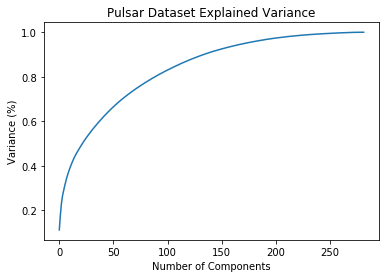

In [40]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [ ]:
# taken from here: https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

In [ ]:
# I chose 200 components because 

In [45]:
# considering the number of principle components to retain, the new PCA is conducted:
n_components = 200
pca_azdias = pca.fit_transform(azdias_scaled)
#we reduced the data from 281 dimensions to 200 components

In [46]:
pickle.dump(pca_azdias, open("pca_azdias.pickle", "wb"))

In [48]:
pickle.dump(customers_scaled, open("customers_scaled.pickle", "wb"))

In [ ]:
# KMeans will be applied to see how data was clustered and to decide how many principal components to keep. 

In [1]:
import pickle
pca_azdias = pickle.load(open("pca_azdias.pickle", "rb"))

In [3]:
pca_azdias

array([[  7.56000444e-02,   6.19246515e-01,  -1.19176376e-01, ...,
         -1.41414633e-04,  -4.08091914e-05,  -2.40232119e-16],
       [  1.49484939e+00,  -1.44843921e+00,   8.77127746e-01, ...,
          7.35770434e-04,  -2.64622447e-03,   5.26850550e-16],
       [ -3.08648760e-01,  -6.66692376e-01,   1.23009241e+00, ...,
         -3.11804149e-04,   3.83901599e-03,   1.74835174e-16],
       ..., 
       [ -8.44112881e-01,  -2.04136799e+00,   2.79207309e-01, ...,
          2.16690916e-05,  -7.45643175e-05,  -7.77945573e-17],
       [  2.08848344e+00,  -9.24725208e-01,  -1.34354164e+00, ...,
         -1.75395162e-03,   9.85302575e-04,   4.15748452e-16],
       [ -1.05106937e+00,   9.29260148e-01,  -6.47701862e-02, ...,
          9.46811536e-04,   6.02735158e-03,   2.54322204e-18]])

In [2]:
from sklearn.cluster import KMeans

In [14]:
pca_azdias

array([[  7.56000444e-02,   6.19246515e-01,  -1.19176376e-01, ...,
         -1.41414633e-04,  -4.08091914e-05,  -2.40232119e-16],
       [  1.49484939e+00,  -1.44843921e+00,   8.77127746e-01, ...,
          7.35770434e-04,  -2.64622447e-03,   5.26850550e-16],
       [ -3.08648760e-01,  -6.66692376e-01,   1.23009241e+00, ...,
         -3.11804149e-04,   3.83901599e-03,   1.74835174e-16],
       ..., 
       [ -8.44112881e-01,  -2.04136799e+00,   2.79207309e-01, ...,
          2.16690916e-05,  -7.45643175e-05,  -7.77945573e-17],
       [  2.08848344e+00,  -9.24725208e-01,  -1.34354164e+00, ...,
         -1.75395162e-03,   9.85302575e-04,   4.15748452e-16],
       [ -1.05106937e+00,   9.29260148e-01,  -6.47701862e-02, ...,
          9.46811536e-04,   6.02735158e-03,   2.54322204e-18]])

In [3]:
from sklearn.cluster import KMeans
def k_means_trial(data, center):
    kmeans = KMeans(n_clusters = center, random_state = 23, n_jobs = -1)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    return score

In [ ]:
import numpy as np
list_score =  []
centers = list(range(4,7))
for center in centers:
    list_score.append(k_means_trial(pca_azdias, center))

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(7, 6)) 
plt.plot(centers, list_score, color='green', marker='o', linestyle='dashed');
matplotlib.rc('xtick', labelsize=20)  
matplotlib.rc('ytick', labelsize=20)
plt.xlabel('K', fontsize=10)
plt.ylabel('SSE', fontsize=10)
plt.title('K', fontsize=10)
plt.show()

In [2]:
import pickle
pca_azdias = pickle.load(open("pca_azdias.pickle", "rb"))

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state = 23, n_jobs = -1)
azdias_kmeans_predict = kmeans.fit_predict(pca_azdias)

In [5]:
azdias_kmeans_predict

array([0, 0, 0, ..., 0, 2, 1], dtype=int32)

In [6]:
pickle.dump(azdias_kmeans_predict, open("azdias_kmeans_predict.pickle", "wb"))

In [7]:
import pickle
azdias_kmeans_predict = pickle.load(open("azdias_kmeans_predict.pickle", "rb"))

In [39]:
import pandas as pd
azdias_count_cluster = pd.Series(azdias_kmeans_predict).value_counts()

In [40]:
azdias_count_cluster

0    334291
1    317482
2    224662
3     14786
dtype: int64

In [10]:
length = len(azdias_kmeans_predict)

In [11]:
percent = 100 * (azdias_count_cluster.values)/length

In [20]:
clusters_azdias = pd.DataFrame({'Number of the cluster': azdias_count_cluster.index, 'Percent': percent})

In [21]:
clusters_azdias

,Number of the cluster,Percent
0,0,37.509327
1,1,35.623263
2,2,25.208338
3,3,1.659072


In [23]:
pickle.dump(clusters_azdias, open("clusters_azdias.pickle", "wb"))

In [2]:
import pickle
customers_kmeans_predict = pickle.load(open("customers_kmeans_predict.pickle", "rb"))

In [3]:
import pandas as pd
customers_count_cluster = pd.Series(customers_kmeans_predict).value_counts()

In [4]:
customers_count_cluster

0    64440
1    47430
2    44881
3    34901
dtype: int64

In [1]:
customers_count_cluster

NameError: name 'customers_count_cluster' is not defined

In [35]:
length = len(customers_kmeans_predict)

In [36]:
percent = 100 *(customers_count_cluster.values/length)

In [37]:
clusters_customers = pd.DataFrame({'Number of the cluster': customers_count_cluster.index, 'Percent': percent})

In [34]:
clusters_customers

,Number of the cluster,Percent
0,0,16110.00
1,1,11857.50
2,2,11220.25
3,3,8725.25


In [17]:
customers_kmeans_predict

array([2, 0, 3, ..., 2, 3, 0], dtype=int32)

In [ ]:
# KMeans will be applied to see how data was clustered and to decide how many principal components to keep. 

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')